Saving d893cde26aec03786b0817a90eeaa526.jpg to d893cde26aec03786b0817a90eeaa526.jpg


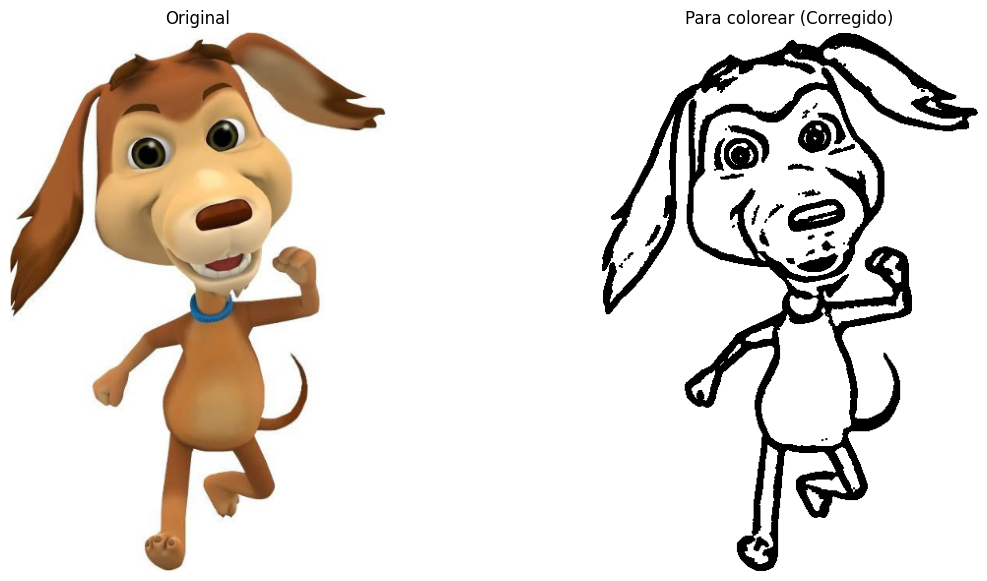

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Subir imagen
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Leer imagen y escalar si es muy grande
img = cv2.imread(filename)
img = cv2.resize(img, (0, 0), fx=0.8, fy=0.8)

# Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Suavizado para quitar ruido y mantener bordes
gray = cv2.bilateralFilter(gray, d=9, sigmaColor=75, sigmaSpace=75)
gray = cv2.medianBlur(gray, 5)

# Detección de bordes estilo dibujo (mejor que Canny)
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, blockSize=9, C=2)

# Invertir colores para fondo blanco
inverted = cv2.bitwise_not(edges)

# Dilatar para engrosar líneas (opcional)
kernel = np.ones((2, 2), np.uint8)
inverted = cv2.dilate(inverted, kernel, iterations=1)

# Invertimos nuevamente para fondo blanco y líneas negras
final = cv2.bitwise_not(inverted)

# Mostrar resultado
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Para colorear")
plt.axis('off')
plt.imshow(final, cmap='gray')
plt.show()